In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc

#**Método de Runge Kutta4:**
El método de Runge-Kutta de orden cuatro es un método numérico para resolver ecuaciones diferenciales ordinarias. Se basa en aproximar la solución a 

\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = f(t, y)
\end{equation}

con condiciones iniciales $y(t_0)=y_0$ a:


\begin{equation}
y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{equation}

donde $h$ es el tamaño del paso y
\begin{equation}
k_1 = f(x_n, y_n)
\end{equation}
\begin{equation}
k_2 = f(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_1)
\end{equation}
\begin{equation}
k_3 = f(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_2)
\end{equation}
\begin{equation}
k_4 = f(x_n + h, y_n + hk_3)
\end{equation}
El orden de convergencia del método es cuatro, lo que significa que el error local es proporcional a $h^5$ y el error global es proporcional a $h^4$.

In [2]:
#Definir la función
def func(t,y,args):
  a = args[0]
  dydt = -a*y
  return dydt

#CONDICIONES INICIALES
t0, tf = 0.0 , 1.0    #Tiempo inicial - final
Nt = 1000             #Partición del tiempo
y0 = 100              #Cond. inicial y0
a = 1                 #Parámetro de la EDO              
h = (tf-t0)/Nt              #Tamaño del paso

t = np.linspace(t0,tf,Nt)  #Tiempo
args = (a,)                 #Parámetros de la func.

#DEFINIR LOS K
k1 = func(t0,y0, args)
k2 = func(t0 + h/2 , y0 + (h/2)*k1 , args)
k3 = func(t0 + h/2 , y0 + (h/2)*k2 , args)
k4 = func(t0 + h   , y0 +  h*k3    , args)
kmean = (h/6)*(k1 + 2*k2 + 2*k3 + k4)

#Hallemos y1
y1 = y0 + kmean
y1

99.9000499833375

In [3]:
def RungeKutta(func, y0, t0, tf, pasos, args):
  h = (tf-t0)/pasos
  t =  np.linspace(t0,tf,pasos)
  arreglo = np.zeros(pasos)

  for i in range(pasos):
    k1 = func(t[i],y0, args)
    k2 = func(t[i] + h/2 , y0 + (h/2)*k1 , args)
    k3 = func(t[i] + h/2 , y0 + (h/2)*k2 , args)
    k4 = func(t[i] + h   , y0 +  h*k3    , args)
    kmean = (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    y0 = y0 + kmean
    arreglo[i] = y0
  
  return y0, t, arreglo

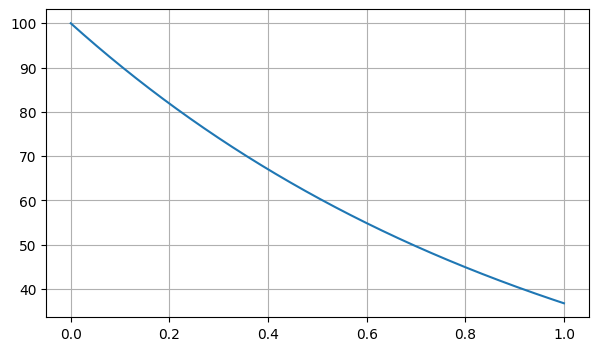

In [4]:
runge = RungeKutta(func, y0, t0, tf, pasos=10000, args=(a,))
plt.figure(figsize=(7,4))
plt.plot(runge[1],runge[2])
plt.grid()

#**Ecuaciones del caos**


\begin{equation}
\frac{\mathrm{d}x}{\mathrm{d}t} = a(y-x)
\end{equation}

\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = x(b-z)-y
\end{equation}

\begin{equation}
\frac{\mathrm{d}z}{\mathrm{d}t} = xy-cz
\end{equation}

In [22]:
#FUNCIÓN QUE RETORNA LAS ECUACIONES DIFERENCIALES DE LORENTZ
    #args es un array con los valores para a,b,c de dichas ecuaciones
      #cond_inicial es un vector tridimensional con las coordenadas en x,y,z

def lorentz(t, cond_inicial , args = (10.0, 28.0, 8/3.0)):
  x, y, z = cond_inicial 

  return np.array([args[0]*(y - x),  x*(args[1] - z) - y, x*y - args[2]*z])


#FUNCIÓN QUE REALIZA LA RUTINA DE RUNGEKUTTA PARA LAS ECUACIONES DE LORENTZ

def RungeKuttaLorentz(func, cond_inicial, t0, tf, pasos,  args = (10.0, 28.0, 8/3.0)):
  h = (tf-t0)/pasos               #h = tamaño del paso
  t =  np.linspace(t0,tf,pasos)   #linspace del tiempo

  vector = np.zeros((pasos+1,len(cond_inicial)))    #Matriz de ceros con 3 columnas y tantas filas como pasos. 

  #Se define la primera fila (posición inicial en x,y,z)

  vector[0,:] = cond_inicial              #Cada fila será un vector tridimencional que describe la posición en ese paso.

  #Pasos del rungekutta
  for i in range(pasos):
    k1 = func(t[i],vector[i,:], args)
    k2 = func(t0 + h/2 , vector[i,:] + (h/2)*k1 , args)
    k3 = func(t0 + h/2 , vector[i,:] + (h/2)*k2 , args)
    k4 = func(t0 + h   , vector[i,:] +  h*k3    , args)
    kmean = (h/6)*(k1 + 2*k2 + 2*k3 + k4)


    vector[i+1,:] = vector[i,:] + kmean
  
  return vector[-1,:], t, vector   #Retorna la última fila (última posición), el array del tiempo y el array de todas las posiciones


#Definimos las condiciones inciales
cond_inicial = np.array([1.0, 1.0, 1.0])
t0, tf = 0, 40
pasos = 10000


lorentz(t, cond_inicial)

array([ 0.        , 26.        , -1.66666667])

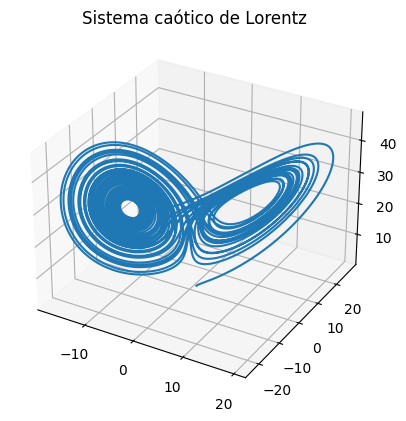

In [32]:
Lorentz = RungeKuttaLorentz(lorentz, cond_inicial, t0, tf, pasos)

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.title('Sistema caótico de Lorentz')
ax.plot3D(Lorentz[2][:,0], Lorentz[2][:,1], Lorentz[2][:,2])